In [105]:
#Importing libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

In [106]:
data=pd.read_csv("Iris.csv")
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

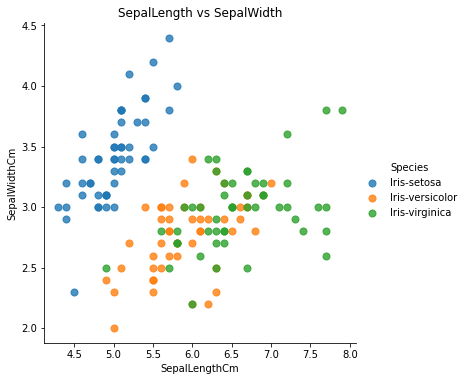

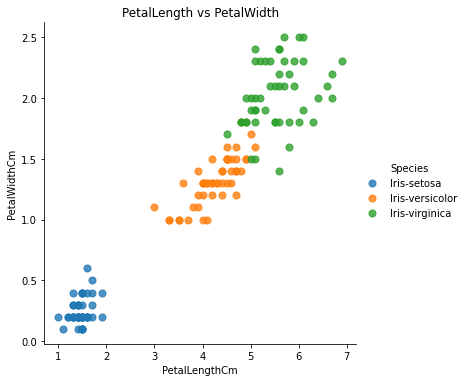

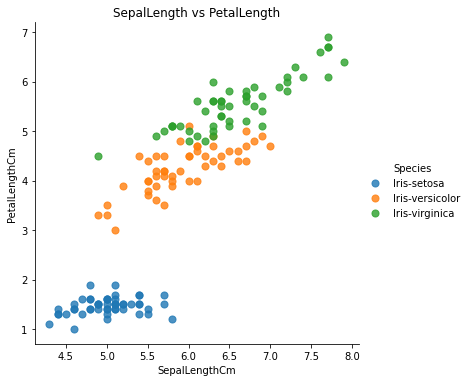

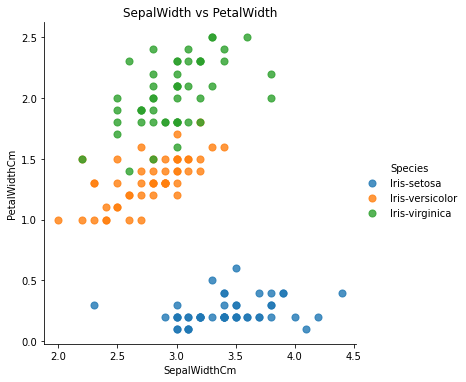

In [107]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',data=data, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=data, fit_reg=False,  hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm', data=data, fit_reg=False, hue="Species", scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm', data=data,  fit_reg=False,  hue="Species",  scatter_kws={"marker": "D", "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [108]:
print(data["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [109]:

data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

data=data.iloc[np.random.permutation(len(data))]
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
40    41            5.0           3.5            1.3           0.3       0
106  107            4.9           2.5            4.5           1.7       2
31    32            5.4           3.4            1.5           0.4       0
64    65            5.6           2.9            3.6           1.3       1
125  126            7.2           3.2            6.0           1.8       2


In [110]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])


Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[5.  3.5 1.3 0.3]
 [4.9 2.5 4.5 1.7]
 [5.4 3.4 1.5 0.4]]
Examples of y
 [0 2 0]


In [111]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.06917906 0.09265065 0.02557886 0.01725449]
 [0.06779548 0.06617903 0.0885422  0.09777546]
 [0.07471338 0.09000348 0.02951407 0.02300599]]


In [112]:
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [113]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [114]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_89 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_90 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_22 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 56ms/step - loss: 1.1091 - accuracy: 0.4131 - val_loss: 0.9108 - val_accuracy: 0.6667
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 0.7786 - accuracy: 0.6067 - val_loss: 0.6072 - val_accuracy: 0.6000
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.5777 - accuracy: 0.6173 - val_loss: 0.6832 - val_accuracy: 0.6000
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 0.4455 - accuracy: 0.7593 - val_loss: 0.5754 - val_accuracy: 0.6667
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 0.3454 - accuracy: 0.8054 - val_loss: 0.2445 - val_accuracy: 0.9000
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 0.1679 - accuracy: 0.9473 - val_loss: 0.1215 - val_accuracy: 0.8667
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.1370 - accuracy: 0.9448 - val_loss: 0.1676 - val_accuracy: 0.9333
Epoch 8/10
6/6 [============

In [116]:
model.evaluate(
    x=X_train,y=y_train,
    batch_size=20,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,

)
from keras.callbacks import LambdaCallback
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: 
        print(model.layers[0].get_weights()))


#print(model.layers[4].get_weights())

6/6 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9833


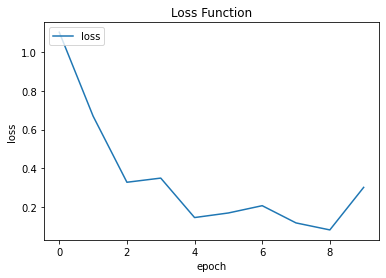

In [117]:

plt.plot(history.history['loss'])
plt.title('Loss Function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

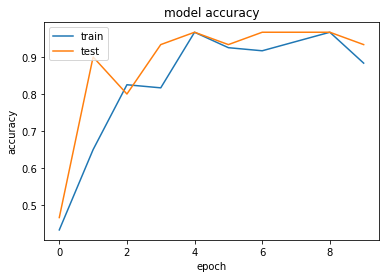

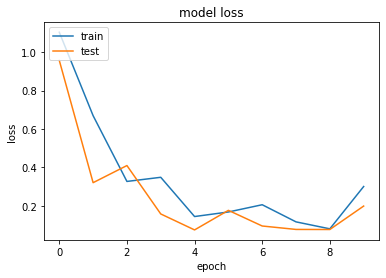

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
def accuracy_met1(actual, predicted):
        correct = 0
        for i in range(len(actual)):
                if actual[i] == predicted[i]:
                        correct += 1
        return correct / float(len(actual)) * 100.0

pr=model.predict(X_normalized)
predicted=np.argmax(pr,axis=1)
actual=y
accuracy = accuracy_met1(actual, predicted)
print(accuracy)

97.33333333333334


In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

cm=confusion_matrix(actual.tolist() , predicted.tolist()) 
print(cm)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n' ,FP)
print('False Negetives\n ',FN)
print('True Positives\n ' ,TP)
print('True Negetives\n ',TN)
TPR = TP/(TP+FN)
print('Sensitivity \n ', TPR)
TNR = TN/(TN+FP)
print('Specificity \n ',TNR)
Precision = TP/(TP+FP)
print('Precision \n ',Precision)
Recall = TP/(TP+FN)
print('Recall \n ',Recall)
Acc1 = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy \n', Acc1)
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n',Fscore)
k=cohen_kappa_score(actual.tolist(), predicted.tolist())
print('Cohen Kappa \n' ,k)

[[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]
False Positives
 [0 0 4]
False Negetives
  [0 4 0]
True Positives
  [50 46 50]
True Negetives
  [100 100  96]
Sensitivity 
  [1.   0.92 1.  ]
Specificity 
  [1.   1.   0.96]
Precision 
  [1.         1.         0.92592593]
Recall 
  [1.   0.92 1.  ]
Accuracy 
 [1.         0.97333333 0.97333333]
FScore 
 [1.         0.95833333 0.96153846]
Cohen Kappa 
 0.96
